In [109]:
import pandas as pd
import json

In [112]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_all_fitted_curves(folder_path="fitted_curves"):
    """
    Plots all the fitted curves from the .npz files in the given folder, 
    and sorts the legend in ascending order by dataset names.
    
    Parameters:
    folder_path (str): The path to the folder containing the .npz files with fitted curve data.
    """
    # Get a list of all .npz files in the folder and sort them by dataset name
    npz_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".npz")])

    # Create a plot
    plt.figure(figsize=(12, 8))
    
    for file in npz_files:
        dataset_name = os.path.splitext(file)[0].replace("fitted_curve_", "")
        file_path = os.path.join(folder_path, file)
        
        # Load the data
        data = np.load(file_path)
        x_fit = data['x_fit']
        y_fit = data['y_fit']
        
        # Plot the curve with a label
        plt.plot(x_fit, y_fit, label=dataset_name)
    
    # Sort the legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_labels_handles = sorted(zip(labels, handles), key=lambda x: x[0])
    sorted_labels, sorted_handles = zip(*sorted_labels_handles)
    
    # Add plot labels, sorted legend, and title
    plt.xlabel('Number of Gaussians')
    plt.ylabel('PSNR')
    plt.xscale('log')
    plt.title('Fitted Curves for All Scenes')
    plt.legend(sorted_handles, sorted_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Position the legend outside the plot
    plt.grid(True)

    # Save the combined plot as an image
    output_image_path = os.path.join("files", "all_fitted_curves.png")
    #plt.savefig(output_image_path, bbox_inches='tight')
    plt.close()

    print(f"All fitted curves plot saved to {output_image_path}")

# Call the function to plot all fitted curves
#plot_all_fitted_curves(folder_path="/bigwork/nhmlhuer/gaussian-splatting/fitted_curves")


In [113]:
import pandas as pd
import os
# List of file paths
file_paths = [
    "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json",
    "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json",
    "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json",
    "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json"
]

dfs = []
for file_path in file_paths:
    df = pd.read_json(file_path)
    # Add a column indicating the source file
    df['source_file'] = os.path.basename(file_path)
    dfs.append(df)
    print(f"Loaded {len(df)} entries from {file_path}")

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame has {len(combined_df)} entries before filtering.")

# Convert 'PSNR' and 'num_points' to numeric, handling errors
combined_df['PSNR'] = pd.to_numeric(combined_df['PSNR'], errors='coerce')
combined_df['num_points'] = pd.to_numeric(combined_df['num_points'], errors='coerce')

# Check for any null values
print("Null values in 'PSNR':", combined_df['PSNR'].isnull().sum())
print("Null values in 'num_points':", combined_df['num_points'].isnull().sum())

# Drop NaN entries in critical columns
combined_df = combined_df.dropna(subset=['PSNR', 'num_points'])
print(f"Combined DataFrame has {len(combined_df)} entries after filtering.")
# Step 4: Create Pareto fronts for each dataset using the provided CSV files
datasets = combined_df['dataset_name'].unique()

# Directory containing the Pareto front CSV files
pareto_csv_dir = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs"
pareto_csv_dir_30k = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs_30k"

Loaded 6 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json
Loaded 24 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json
Loaded 68 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json
Loaded 20 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json
Combined DataFrame has 118 entries before filtering.
Null values in 'PSNR': 0
Null values in 'num_points': 0
Combined DataFrame has 118 entries after filtering.


In [114]:
combined_df

,dataset_name,SSIM,PSNR,num_points,meta_model,meta_reward_function,meta_base_model,meta_rl_lr,source_file,meta_complexity_penalty
0,20Puppy,0.916970,25.416317,37786,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
1,19Bear,0.928453,27.286463,37711,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
2,01Gorilla,0.877630,22.178190,36315,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
3,18Obesobeso,0.910284,25.052919,36644,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],not_exisiting,0.0010,final_eval_reinforce_pruning_pareto.json,NaN
4,01Gorilla,0.942967,30.632458,55811,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,final_eval_reinforce_pruning_pareto.json,NaN
...,...,...,...,...,...,...,...,...,...,...
113,18Obesobeso,0.951132,32.739830,76310,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,final_eval_reinforce_default_pruning_pareto.json,NaN
114,20Puppy,0.954407,31.702965,42509,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN
115,01Gorilla,0.940772,30.056236,15973,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN
116,19Bear,0.954963,32.652260,42688,/bigwork/nhmlhuer/git/backup/gaussian_splattin...,[reward_pareto],/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0010,final_eval_reinforce_default_pruning_pareto.json,NaN


In [115]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define file paths along with their assigned names
file_infos = [
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json",
        'name': 'REINFORCE Agent Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json",
        'name': 'REINFORCE Agent Pruning'
    },
    {
    
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json",
        'name': 'REINFORCE Default Pruning'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json",
       'name': 'REINFORCE Default Pruning'
    },
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_per_gaussian_reward_default_pruning.json",
    #    'name': 'PPO Default Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_per_gaussian_reward_agent_pruning.json",
    #    'name': 'PPO Agent Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_ppo_default_pruning.json",
    #    'name': 'PPO Default Pruning'
    #},
    #{
    #    'file_path': "/bigwork/nhmlhuer/git/backup/gs_rl/final_eval_ppo_agent_pruning.json",
    #    'name': 'PPO Agent Pruning'
    #},
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_random_model.json",
        'name': 'Random Model'
    },
    {
        'file_path': "/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_base_model.json",
        'name': 'Imitation Base Model'
    }
]

In [116]:
image_name = "legend"
dfs = []
for file_info in file_infos:
    file_path = file_info['file_path']
    name = file_info['name']
    df = pd.read_json(file_path)
    # Add columns indicating the assigned name and source file
    df['source_name'] = name
    df['source_file'] = os.path.basename(file_path)
    dfs.append(df)
    print(f"Loaded {len(df)} entries from {file_path}")

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame has {len(combined_df)} entries before filtering.")

# Convert 'PSNR' and 'num_points' to numeric, handling errors
combined_df['PSNR'] = pd.to_numeric(combined_df['PSNR'], errors='coerce')
combined_df['num_points'] = pd.to_numeric(combined_df['num_points'], errors='coerce')

# Check for any null values
print("Null values in 'PSNR':", combined_df['PSNR'].isnull().sum())
print("Null values in 'num_points':", combined_df['num_points'].isnull().sum())

# Drop NaN entries in critical columns
combined_df = combined_df.dropna(subset=['PSNR', 'num_points'])
print(f"Combined DataFrame has {len(combined_df)} entries after filtering.")

# Step 4: Create Pareto fronts for each dataset using the provided CSV files
datasets = combined_df['dataset_name'].unique()

# Directory containing the Pareto front CSV files
pareto_csv_dir = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs"
pareto_csv_dir_30k = "/bigwork/nhmlhuer/gaussian-splatting/dataset_csvs_30k"

# Create a dictionary mapping the old column names to the new column names
column_mapping = {
    "meta_reward_function": "Reward function",
    "meta_base_model": "Base model",
    "meta_rl_lr": "RL learning rate",
    "meta_complexity_penalty": "Complexity penalty",
    "meta_ppo_update_frequency": "PPO update frequency",
    "meta_clip_param": "PPO clip param"

}

# Rename the columns in the DataFrame
combined_df.rename(columns=column_mapping, inplace=True)
#combined_df = combined_df[(combined_df['Base model'] != 'not_exisiting')]
#combined_df = combined_df[combined_df['RL learning rate'] == 0.0005]#, 0.001]
# Define a mapping of old names to new names
rename_mapping = {
    "[per_gaussian_relative_diff]": "Per Gaussian",
    "[per_gaussian_pareto]": "Per Gaussian",
    "[reward_psnr_normalized_log_num_gauss]": "PSNR",
    "[reward_diff_psnr_relative]": "Relative Difference",
    "[reward_pareto]": "Pareto"
}

# Apply the mapping to the 'Reward functions' column
combined_df['Reward function'] = combined_df['Reward function'].replace(rename_mapping)

Loaded 6 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning_pareto.json
Loaded 24 entries from /bigwork/nhmlhuer/git/backup/gs_rl/final_eval_reinforce_pruning.json
Loaded 68 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning.json
Loaded 20 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_reinforce_default_pruning_pareto.json
Loaded 4 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_random_model.json
Loaded 8 entries from /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/final_eval_base_model.json
Combined DataFrame has 130 entries before filtering.
Null values in 'PSNR': 0
Null values in 'num_points': 0
Combined DataFrame has 130 entries after filtering.


In [117]:
combined_df

,dataset_name,SSIM,PSNR,num_points,meta_model,Reward function,Base model,RL learning rate,source_name,source_file,Complexity penalty,base_model
0,20Puppy,0.916970,25.416317,37786,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
1,19Bear,0.928453,27.286463,37711,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
2,01Gorilla,0.877630,22.178190,36315,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
3,18Obesobeso,0.910284,25.052919,36644,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
4,01Gorilla,0.942967,30.632458,55811,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
125,20Puppy,0.956612,32.982426,39343,NaN,[with pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
126,19Bear,0.956948,33.596523,158286,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
127,01Gorilla,0.944655,30.932281,110247,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
128,20Puppy,0.958262,33.297985,178149,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN


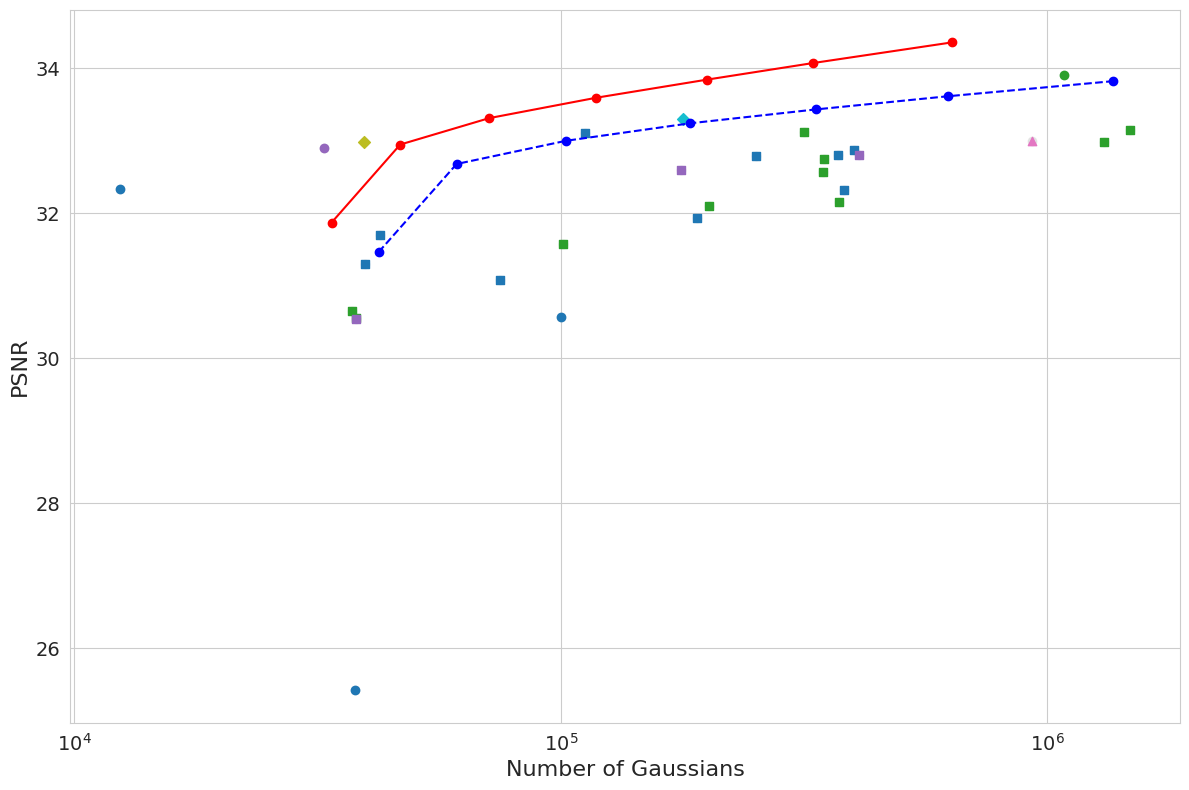

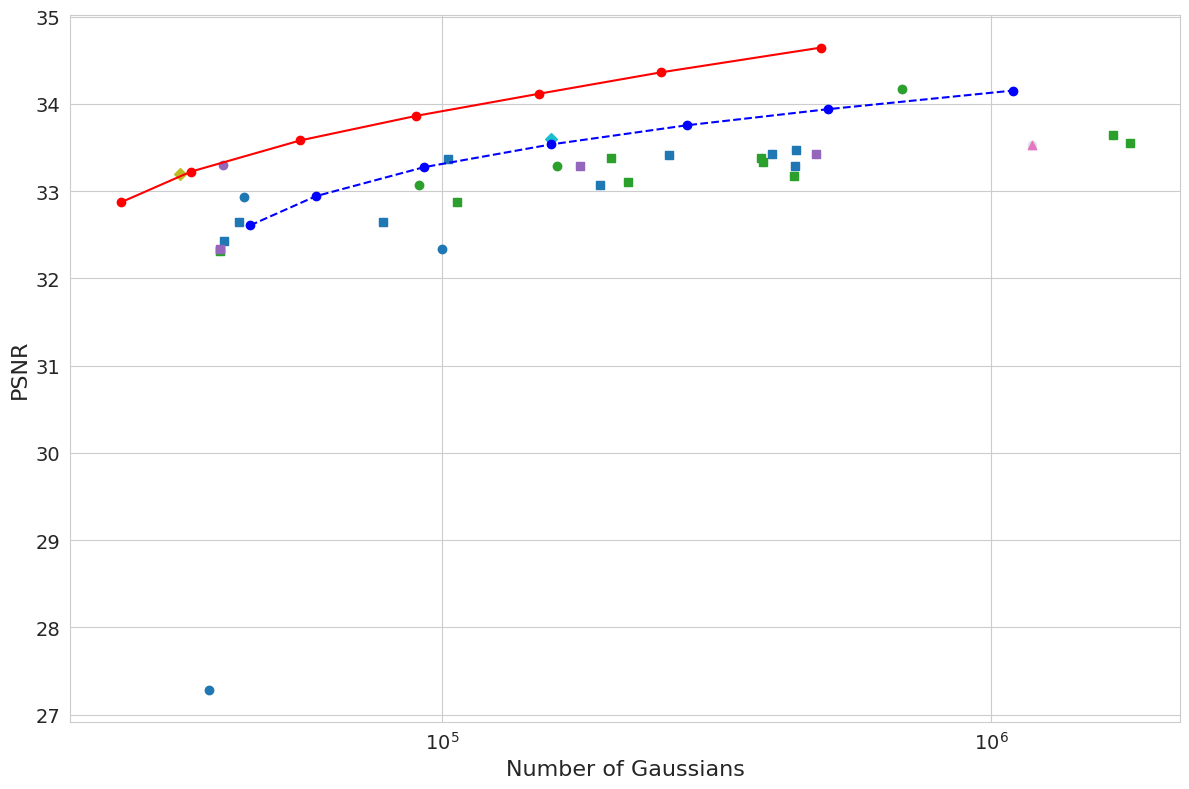

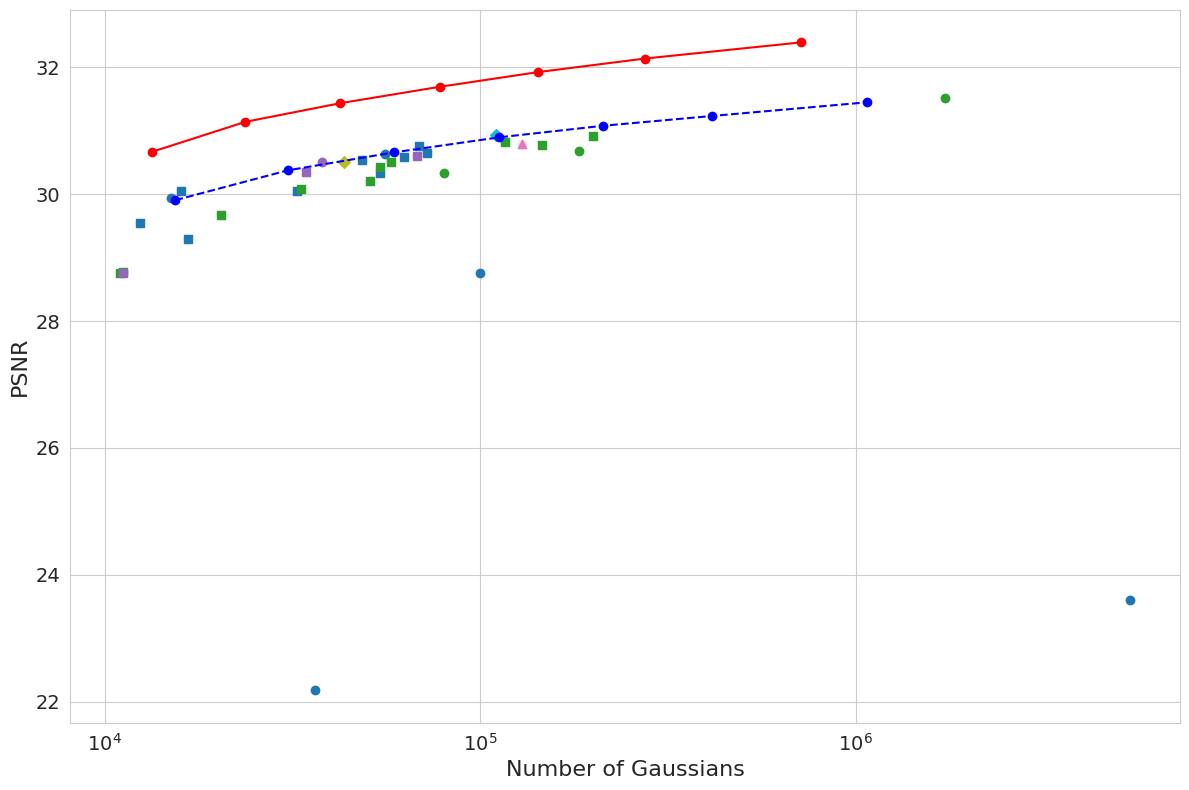

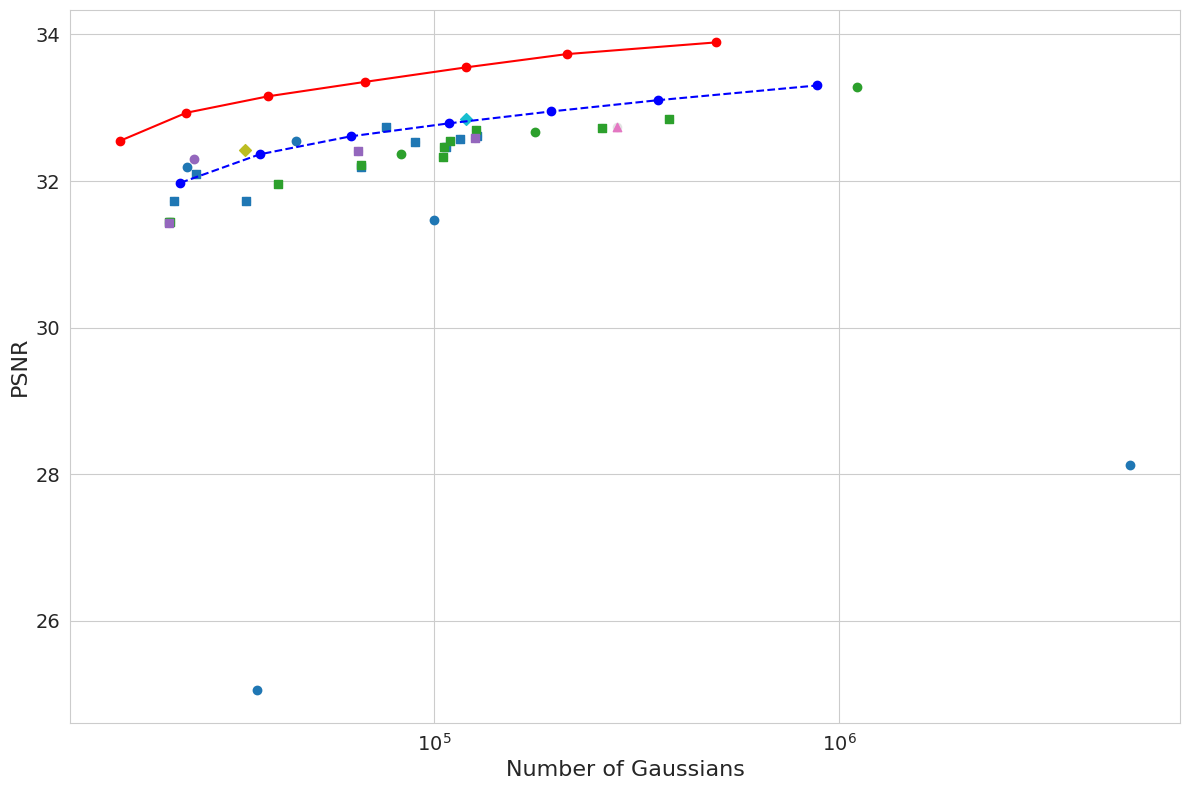

In [118]:
from itertools import product
for dataset_name in datasets:
    # Subset the DataFrame for the current dataset
    df_dataset = combined_df[combined_df['dataset_name'] == dataset_name]
    
    # Read the Pareto front data from the first CSV file
    pareto_csv_file = os.path.join(pareto_csv_dir, f"{dataset_name}.csv")
    if os.path.exists(pareto_csv_file):
        pareto_df = pd.read_csv(pareto_csv_file)
    else:
        print(f"Pareto CSV file not found for dataset {dataset_name} at {pareto_csv_file}")
        pareto_df = pd.DataFrame()
    
    # Read the Pareto front data from the 30k optimization CSV file
    pareto_csv_file_30k = os.path.join(pareto_csv_dir_30k, f"{dataset_name}.csv")
    if os.path.exists(pareto_csv_file_30k):
        pareto_df_30k = pd.read_csv(pareto_csv_file_30k)
    else:
        print(f"30k Pareto CSV file not found for dataset {dataset_name} at {pareto_csv_file_30k}")
        pareto_df_30k = pd.DataFrame()
    
    # Ensure columns are correctly named and types are correct
    for df_pareto in [pareto_df, pareto_df_30k]:
        df_pareto['PSNR'] = pd.to_numeric(df_pareto['PSNR'], errors='coerce')
        df_pareto['num_points'] = pd.to_numeric(df_pareto['num_points'], errors='coerce')
        df_pareto.dropna(subset=['PSNR', 'num_points'], inplace=True)
        df_pareto.sort_values(by='num_points', inplace=True)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot all points in grey for context
    plt.scatter(df_dataset['num_points'], df_dataset['PSNR'], color='lightgrey', label='All Points', alpha=0.5)
    
    # Get unique assigned names and reward functions
    unique_names = df_dataset['source_name'].unique()
    unique_rewards = df_dataset['Reward function'].unique()
    
    # Generate a color map for reward functions
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(unique_rewards)))
    color_map = dict(zip(unique_rewards, colors))
    
    # Define markers for assigned names (extend markers list if needed)
    markers_list = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '+', 'x']
    marker_map = dict(zip(unique_names, markers_list))
    
    # Plot points for each combination of source_name and reward_function
    for (source_name, reward_function) in product(unique_names, unique_rewards):
        df_subset = df_dataset[
            (df_dataset['source_name'] == source_name) &
            (df_dataset['Reward function'] == reward_function)
        ]
        if not df_subset.empty:
            plt.scatter(
                df_subset['num_points'], df_subset['PSNR'],
                color=color_map[reward_function],
                marker=marker_map[source_name],
                label=f"{source_name}_{reward_function}"
            )
    
    # Plot Pareto front from the first CSV file
    if not pareto_df.empty:
        plt.scatter(pareto_df['num_points'], pareto_df['PSNR'], color='red', label='Pareto Front (Full Opt)', zorder=5)
        plt.plot(pareto_df['num_points'], pareto_df['PSNR'], color='red', linestyle='-', zorder=5)
    else:
        print(f"No Pareto data available for dataset {dataset_name} in {pareto_csv_dir}")
    
    # Plot Pareto front from the 30k optimization CSV file
    if not pareto_df_30k.empty:
        plt.scatter(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', label='Pareto Front (30k Opt)', zorder=5)
        plt.plot(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', linestyle='--', zorder=5)
    else:
        print(f"No 30k Pareto data available for dataset {dataset_name} in {pareto_csv_dir_30k}")
    
    # Customize the plot
    #plt.title(f'Pareto Front for {dataset_name}: Minimize Gaussians, Maximize PSNR')
    plt.xscale('log')
    plt.xlabel('Number of Gaussians', fontsize=16)
    plt.ylabel('PSNR', fontsize=16)
    plt.grid(True)
    
    # Increase tick font sizes
    plt.tick_params(axis='both', which='major', labelsize=14)  # Larger tick labels
    plt.tick_params(axis='both', which='minor', labelsize=12)

    # Create custom legend entries
    from matplotlib.lines import Line2D

    # Prepare legend elements
    legend_elements = []
    # First, add method entries
    for name in unique_names:
        marker = marker_map[name]
        legend_elements.append(Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10))

        # Now, add reward functions under this method
        method_rewards = df_dataset[df_dataset['source_name'] == name]['Reward function'].unique()
        for reward in method_rewards:
            color = color_map[reward]
            # Indent the label to simulate hierarchy
            label = f"    {reward}"  # Indent with spaces
            legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10))

    # Pareto fronts legend entries
    pareto_legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Pareto Front (100k Opt)'),
        Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Pareto Front (30k Opt)')
    ]

    # Combine all legend elements
    all_legend_elements = legend_elements + pareto_legend_elements

    # Add legends to the plot
    #plt.legend(handles=all_legend_elements)
    plt.tight_layout()
    output_path = f"files/pareto_reinforce_{dataset_name}.png"
    plt.savefig(output_path)
    plt.show()

In [119]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# ... [Your existing code for loading and processing data] ...

from itertools import product
for dataset_name in datasets:
    # Subset the DataFrame for the current dataset
    df_dataset = combined_df[combined_df['dataset_name'] == dataset_name]
    
    # ... [Your existing code for reading Pareto CSV files] ...
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot all points in grey for context
    plt.scatter(df_dataset['num_points'], df_dataset['PSNR'], color='lightgrey', label='All Points', alpha=0.5)
    
    # Get unique assigned names and reward functions
    unique_names = df_dataset['source_name'].unique()
    unique_rewards = df_dataset['Reward function'].unique()
    
    # Generate a color map for reward functions
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, len(unique_rewards)))
    color_map = dict(zip(unique_rewards, colors))
    
    # Define markers for assigned names (extend markers list if needed)
    markers_list = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '+', 'x']
    marker_map = dict(zip(unique_names, markers_list))
    
    # Plot points for each combination of source_name and reward_function
    for (source_name, reward_function) in product(unique_names, unique_rewards):
        df_subset = df_dataset[
            (df_dataset['source_name'] == source_name) &
            (df_dataset['Reward function'] == reward_function)
        ]
        if not df_subset.empty:
            plt.scatter(
                df_subset['num_points'], df_subset['PSNR'],
                color=color_map[reward_function],
                marker=marker_map[source_name],
                label=f"{source_name}_{reward_function}"
            )
    
    # Plot Pareto fronts
    if not pareto_df.empty:
        plt.scatter(pareto_df['num_points'], pareto_df['PSNR'], color='red', label='Pareto Front (100k Opt)', zorder=5)
        plt.plot(pareto_df['num_points'], pareto_df['PSNR'], color='red', linestyle='-', zorder=5)
    else:
        print(f"No Pareto data available for dataset {dataset_name} in {pareto_csv_dir}")
    
    if not pareto_df_30k.empty:
        plt.scatter(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', label='Pareto Front (30k Opt)', zorder=5)
        plt.plot(pareto_df_30k['num_points'], pareto_df_30k['PSNR'], color='blue', linestyle='--', zorder=5)
    else:
        print(f"No 30k Pareto data available for dataset {dataset_name} in {pareto_csv_dir_30k}")
    
    # Customize the plot
    plt.title(f'Pareto Front for {dataset_name}: Minimize Gaussians, Maximize PSNR')
    plt.xscale('log')
    plt.xlabel('Number of Gaussians (num_points)')
    plt.ylabel('PSNR')
    plt.grid(True)
    
    # Save the plot without legend
    #output_path = f"files/{image_name}_{dataset_name}.png"
    #plt.savefig(output_path, bbox_inches='tight')
    plt.close()  # Close the figure to free memory
    
    # Prepare legend elements
    method_elements = []
    reward_elements = []
    for name in unique_names:
        marker = marker_map[name]
        method_handle = Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10)
        method_elements.append(method_handle)

        # Add reward functions under this method
        method_rewards = df_dataset[df_dataset['source_name'] == name]['Reward function'].unique()
        for reward in method_rewards:
            color = color_map[reward]
            label = f"{reward}"
            handle = Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10)
            reward_elements.append(handle)
    
    # Pareto fronts legend entries
    pareto_legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Pareto Front (100k Opt)'),
        Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Optimization Front (30k Opt)')
    ]
    
    # Now, create a separate figure for the legend
    legend_fig = plt.figure(figsize=(12, 6))
    
    # Calculate the number of columns: one for each method, plus one for Pareto legends
    num_methods = len(unique_names)
    total_columns = num_methods + 1  # +1 for Pareto legends
    
    # Create gridspec for the legend figure
    gs = gridspec.GridSpec(1, total_columns, width_ratios=[1]*total_columns)
    
    # Create an axis for each method
    axes_methods = []
    for i in range(num_methods):
        ax = legend_fig.add_subplot(gs[i])
        ax.axis('off')
        axes_methods.append(ax)
    
    # Create an axis for Pareto legends
    ax_pareto = legend_fig.add_subplot(gs[-1])
    ax_pareto.axis('off')
    
    # Now, for each method, create a legend
    for ax, name in zip(axes_methods, unique_names):
        marker = marker_map[name]
        method_handle = Line2D([0], [0], marker=marker, color='black', linestyle='None', label=name, markersize=10)
        method_rewards = df_dataset[df_dataset['source_name'] == name]['Reward function'].unique()
        reward_handles = []
        for reward in method_rewards:
            color = color_map[reward]
            label = f"{reward}"
            handle = Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, linestyle='None', label=label, markersize=10)
            reward_handles.append(handle)
        handles = [method_handle] + reward_handles
        labels = [h.get_label() for h in handles]
        ax.legend(handles=handles, labels=labels, loc='center', frameon=False)
    
    # Create legend for Pareto fronts
    handles_pareto = pareto_legend_elements
    labels_pareto = [h.get_label() for h in handles_pareto]
    #ax_pareto.legend(handles=handles_pareto, labels=labels_pareto, loc='center', frameon=False)
    #ax_pareto.legend(
    #    handles=handles_pareto, 
    #    labels=labels_pareto, 
    #    loc='center', 
    #    frameon=False,
    #    fontsize=10,  # Adjust the font size
   #     labelspacing=12.0,  # Add spacing between labels
    #    borderaxespad=1.0  # Add padding around the legend
    #)
    # Create legend for Pareto fronts in a single grouped axis

    ax_pareto.legend(
        handles=handles_pareto,
        labels=labels_pareto,
        loc='center',
        frameon=False,  # Add a box around the Pareto legends
        fontsize=10,
        labelspacing=0.5,
        #borderaxespad=1.0,
        handlelength=2
    )
    # Adjust layout
    plt.tight_layout()
    
    # Save the legend figure
    output_legend_path = f"files/reinforce_legend_{dataset_name}.png"
    #legend_fig.savefig(output_legend_path, bbox_inches='tight')
    plt.close(legend_fig)  # Close the legend figure to free memory


In [120]:
combined_df
# Get the minimum and maximum values
min_num_points = combined_df['num_points'].min()
median_num_points = combined_df['num_points'].median()
max_num_points = combined_df['num_points'].max()

print(f"Minimum num_points: {min_num_points}")
print(f"Maximum num_points: {max_num_points}")
print(f"Mean num_points: {median_num_points}")

Minimum num_points: 11006
Maximum num_points: 5364448
Mean num_points: 100001.5


In [121]:
combined_df["Reward function"].unique()

array(['Pareto', 'Relative Difference', 'PSNR', '[No reward]',
       '[with pruning]', '[without pruning]'], dtype=object)

In [122]:
combined_df = combined_df[
    (combined_df['Reward function'] != '[no_reward]')
    #(combined_df['Reward function'] == '[reward_diff_psnr_relative]') &
    #(combined_df['Base model'] != 'not_exisiting')
    #(combined_df['Base model'] == '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_no_pruning_model_long.torch')
    #(combined_df['num_points'] > 200000)
    #(combined_df['Complexity penalty'] == 0.01)
    #(combined_df['meta_model'] == '/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/final_train_ppo_agent_pruning/18-12-22/25')
]
filtered_df = combined_df
filtered_df["meta_model"]
# Display the filtered DataFrame
display(filtered_df)

# Get the unique meta_model(s)
meta_models = filtered_df['meta_model'].unique()
print("Meta Models:")
for model in meta_models:
    print(model)

,dataset_name,SSIM,PSNR,num_points,meta_model,Reward function,Base model,RL learning rate,source_name,source_file,Complexity penalty,base_model
0,20Puppy,0.916970,25.416317,37786,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
1,19Bear,0.928453,27.286463,37711,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
2,01Gorilla,0.877630,22.178190,36315,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
3,18Obesobeso,0.910284,25.052919,36644,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,not_exisiting,0.0010,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
4,01Gorilla,0.942967,30.632458,55811,/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multi...,Pareto,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.0001,REINFORCE Agent Pruning,final_eval_reinforce_pruning_pareto.json,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
125,20Puppy,0.956612,32.982426,39343,NaN,[with pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
126,19Bear,0.956948,33.596523,158286,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
127,01Gorilla,0.944655,30.932281,110247,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN
128,20Puppy,0.958262,33.297985,178149,NaN,[without pruning],/bigwork/nhmlhuer/git/master_evaluation/imitat...,NaN,Imitation Base Model,final_eval_base_model.json,NaN,NaN


Meta Models:
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/final_reinforce_pruning_pareto/17-25-11/3/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/final_reinforce_pruning_pareto/17-25-11/2/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-47-10/14/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-47-10/8/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/4/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/3/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/8/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-47-10/13/meta_model.torch
/bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/2/meta_model.torch
/bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-10-16/19-50-07/10/meta_model.torch
/bigwork/nhmlhuer/git/backup/gaussian_

In [123]:
# Calculate the mean, std, and count for 'psnr' and 'num_points' grouped by 'Reward function'
result = filtered_df.groupby('Reward function').agg(
    num_runs=('Reward function', 'count'),
    mean_psnr=('PSNR', 'mean'),
    std_psnr=('PSNR', 'std'),
    median_num_points=('num_points', 'median'),
    mean_num_points=('num_points', 'mean'),
    std_num_points=('num_points', 'std')
).reset_index()
result

,Reward function,num_runs,mean_psnr,std_psnr,median_num_points,mean_num_points,std_num_points
0,PSNR,16,31.881532,1.357786,39712.0,111473.250000,1.403861e+05
1,Pareto,52,31.067661,2.508600,70556.0,312268.884615,1.012558e+06
2,Relative Difference,50,32.031418,1.324252,136287.5,342568.440000,4.829286e+05
3,[No reward],4,32.514921,1.195632,607686.5,632957.500000,5.075950e+05
4,[with pruning],4,32.277114,1.227448,36733.5,37537.250000,4.693368e+03
5,[without pruning],4,32.668322,1.197722,139054.5,141626.250000,3.199738e+04


In [124]:
# Define the datasets and Base models you're interested in
datasets = ['18Obesobeso', '19Bear', '20Puppy', '01Gorilla']
Base_models = [
    '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch',
    '/bigwork/nhmlhuer/git/master_evaluation/imitation_learning_no_pruning_model_long.torch'
]

# Initialize a dictionary to store the results
results = {}

# Loop over each Base model
for base_model in Base_models:
    # Filter the DataFrame for the current base_model
    df_base = filtered_df[filtered_df['Base model'] == base_model]
    
    # Group by meta_model
    grouped = df_base.groupby('meta_model')
    
    # For each meta_model, check if it has runs for all datasets
    for meta_model, group in grouped:
        datasets_in_group = group['dataset_name'].unique()
        
        # Check if all required datasets are present
        if set(datasets).issubset(set(datasets_in_group)):
            print(f"Meta_model: {meta_model} with base_model: {base_model} has runs for all datasets.")
            # Store the runs for further analysis
            results[(base_model, meta_model)] = group
            # Since you only need one such meta_model per base_model, you can break here if desired
            # break  # Uncomment if you want to stop after finding the first matching meta_model
    else:
        # If no meta_model was found with runs for all datasets
        print(f"No meta_model with runs for all datasets was found for base_model: {base_model}")


Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/2/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-46-52/8/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
Meta_model: /bigwork/nhmlhuer/git/backup/gs_rl/hydra/multirun/2024-10-16/19-47-10/8/meta_model.torch with base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch has runs for all datasets.
No meta_model with runs for all datasets was found for base_model: /bigwork/nhmlhuer/git/master_evaluation/imitation_learning_with_opacity_model_long.torch
Meta_model: /bigwork/nhmlhuer/git/backup/gaussian_splatting_rl/hydra/multirun/2024-10-16/19-46-37/2/meta_model.torch with base_model: /bigwork

In [125]:
def reward_pareto(row):
    psnr = row['PSNR']
    num_points = row['num_points']
    dataset_name = row['dataset_name']
    
    # Load the fitted curve data
    fitted_curve_file = f"/bigwork/nhmlhuer/gaussian-splatting/fitted_curves/fitted_curve_{dataset_name}.npz"
    try:
        data = np.load(fitted_curve_file)
        x_fit = data['x_fit']
        y_fit = data['y_fit']
    except FileNotFoundError:
        raise ValueError(f"Fitted curve file for dataset '{dataset_name}' not found at {fitted_curve_file}")
    
    # Interpolate the PSNR from the fitted curve
    psnr_curve = np.interp(num_points, x_fit, y_fit)
    
    # Calculate the PSNR distance
    psnr_distance = np.abs(psnr - psnr_curve)
    
    return psnr_distance
# Apply the function to each row
combined_df['psnr_distance'] = combined_df.apply(reward_pareto, axis=1)
# Filter out rows where 'Reward function' is in the specified list
excluded_rewards = ['[No reward]', '[with pruning]', '[without pruning]']
combined_df = combined_df[~combined_df['Reward function'].isin(excluded_rewards)]



In [126]:
#  Compute Mean PSNR Distance for Each Parameter Value
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of parameters to analyze
parameters = ['Reward function', 'Complexity penalty', 'RL learning rate', 'PPO clip param', 'PPO update frequency']

# Dictionary to store mean PSNR distances
mean_psnr_per_value = {}

for param in parameters:
    # Group by the parameter and compute mean PSNR distance
    mean_psnr = combined_df.groupby(param)['psnr_distance'].mean().reset_index()
    mean_psnr_per_value[param] = mean_psnr

# Set up the plotting environment
sns.set_style('whitegrid')

# Number of parameters
n_params = len(parameters)
fig, axes = plt.subplots(1, n_params, figsize=(5 * n_params, 5))

# Iterate over parameters and create bar plots
for i, param in enumerate(parameters):
    ax = axes[i] if n_params > 1 else axes
    mean_psnr = mean_psnr_per_value[param]
    
    sns.barplot(
        x=param,
        y='psnr_distance',
        data=mean_psnr,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(f'Mean PSNR Distance by {param}')
    ax.set_ylabel('Mean PSNR Distance')
    ax.set_xlabel(param)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

KeyError: 'PPO clip param'

/tmp/ipykernel_2428867/3286899745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


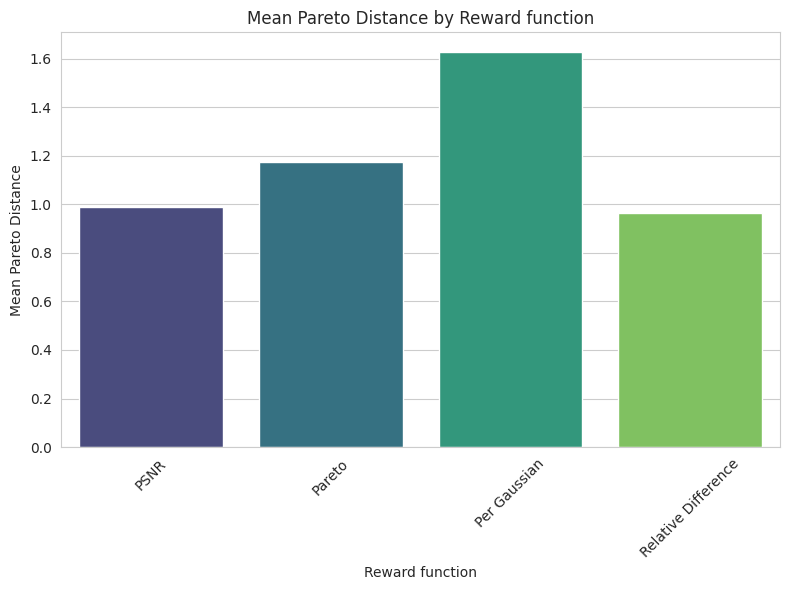

/tmp/ipykernel_2428867/3286899745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


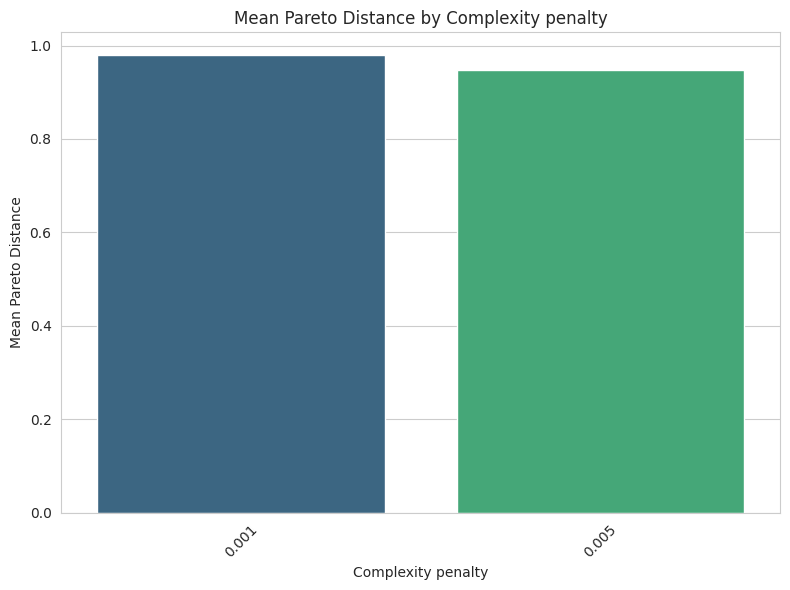

/tmp/ipykernel_2428867/3286899745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


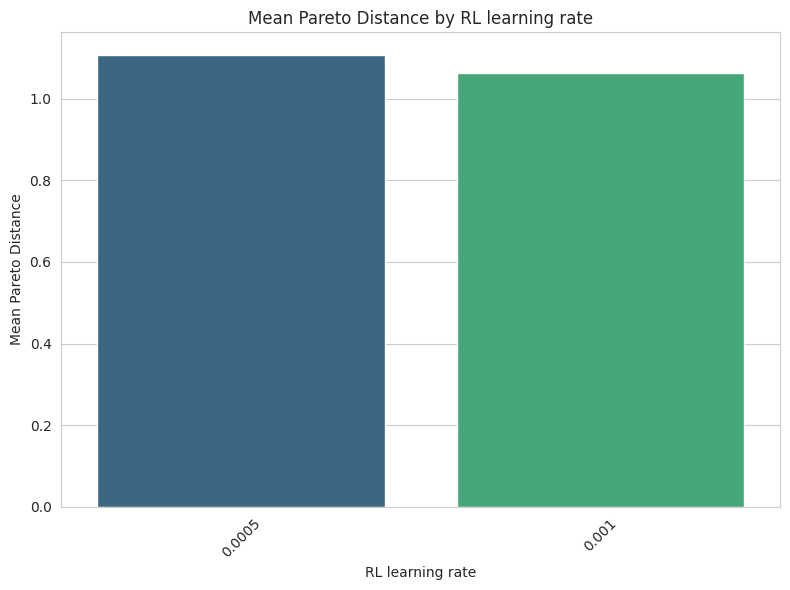

/tmp/ipykernel_2428867/3286899745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


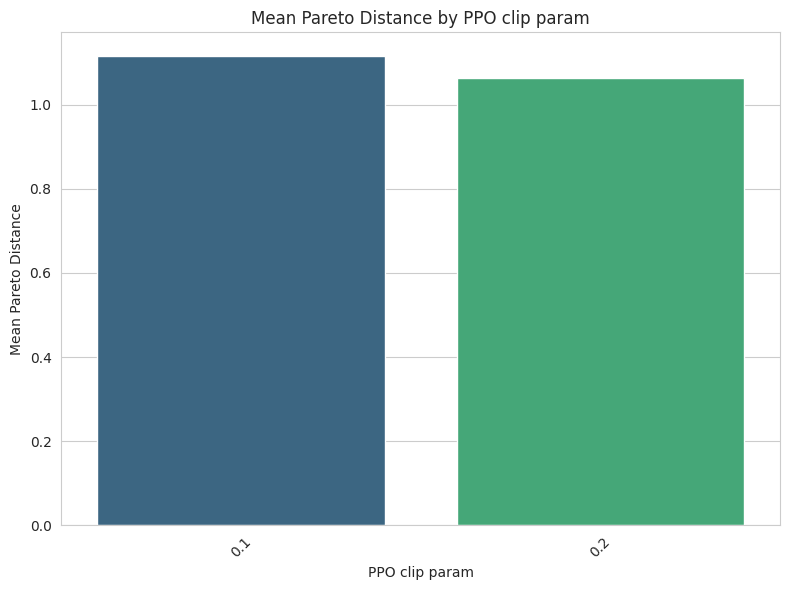

/tmp/ipykernel_2428867/3286899745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


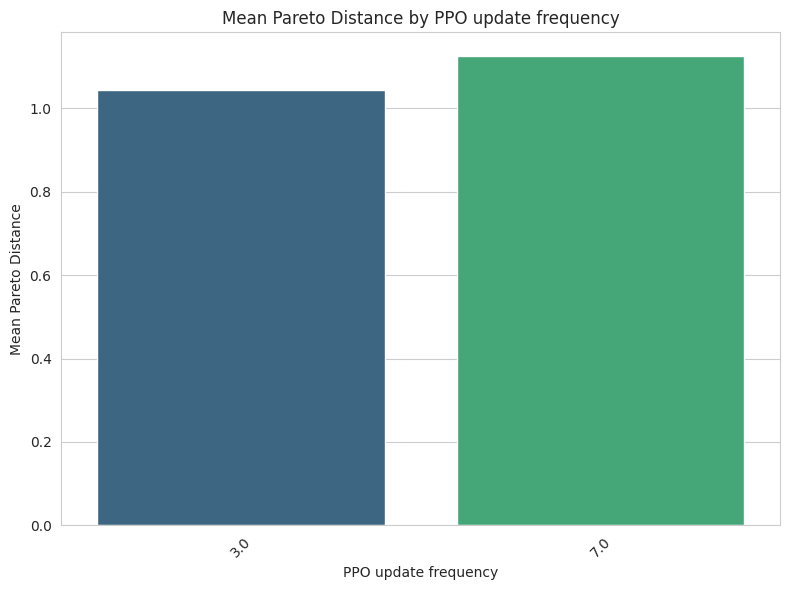

In [ ]:
# List of parameters to analyze
parameters = ['Reward function', 'Complexity penalty', 'RL learning rate', 'PPO clip param', 'PPO update frequency']

# Dictionary to store mean PSNR distances
mean_psnr_per_value = {}

for param in parameters:
    # Group by the parameter and compute mean PSNR distance
    mean_psnr = combined_df.groupby(param)['psnr_distance'].mean().reset_index()
    mean_psnr_per_value[param] = mean_psnr

    # Set up the plotting environment
    sns.set_style('whitegrid')

    # Create a new figure for each parameter
    plt.figure(figsize=(8, 6))

    # Create bar plot
    sns.barplot(
        x=param,
        y='psnr_distance',
        data=mean_psnr,
        palette='viridis'
    )

    plt.title(f'Mean Pareto Distance by {param}')
    plt.ylabel('Mean Pareto Distance')
    plt.xlabel(param)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()

/tmp/ipykernel_2428867/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


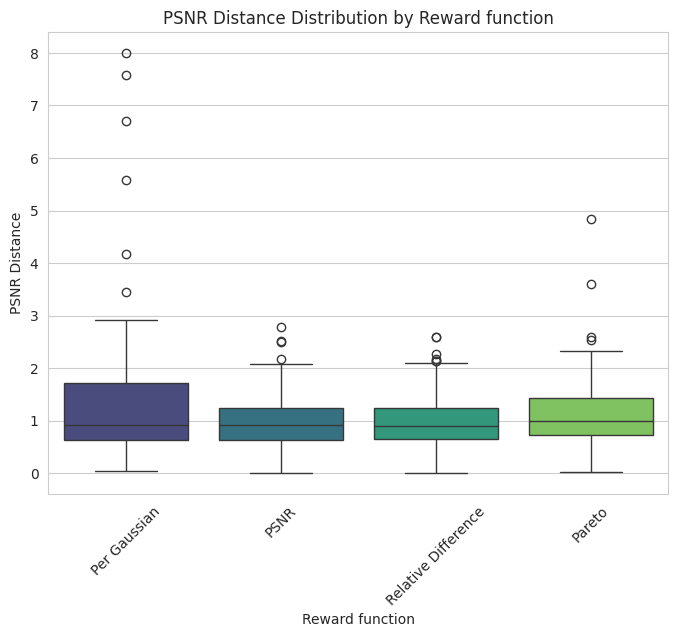

/tmp/ipykernel_2428867/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


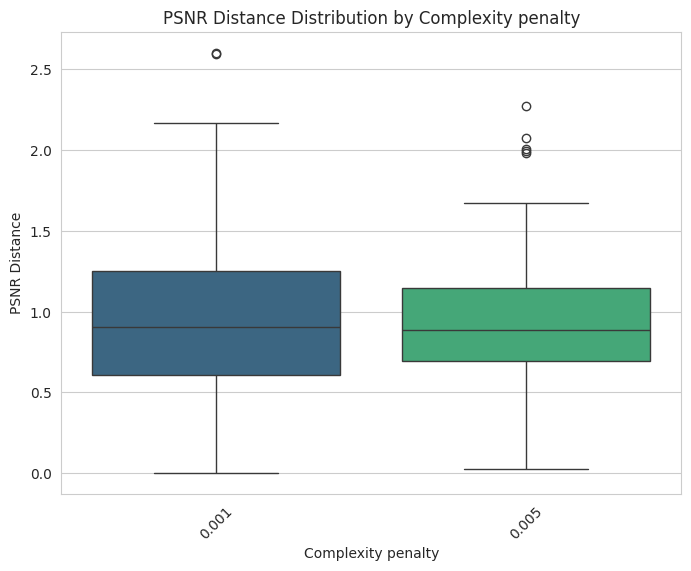

/tmp/ipykernel_2428867/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


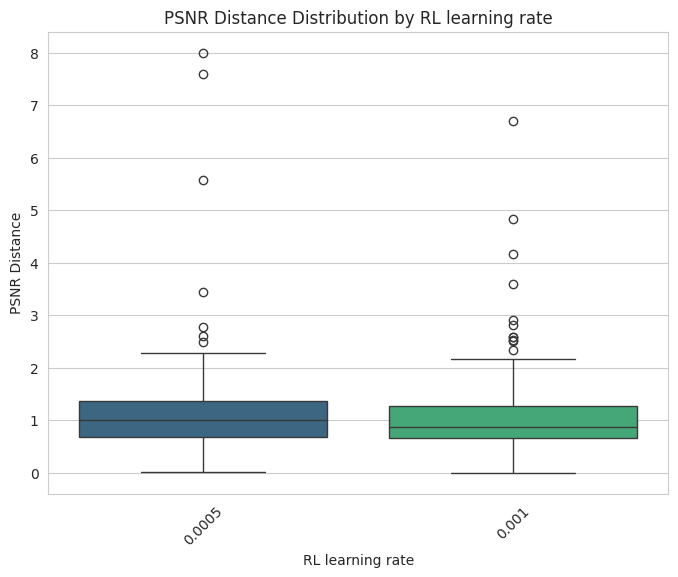

/tmp/ipykernel_2428867/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


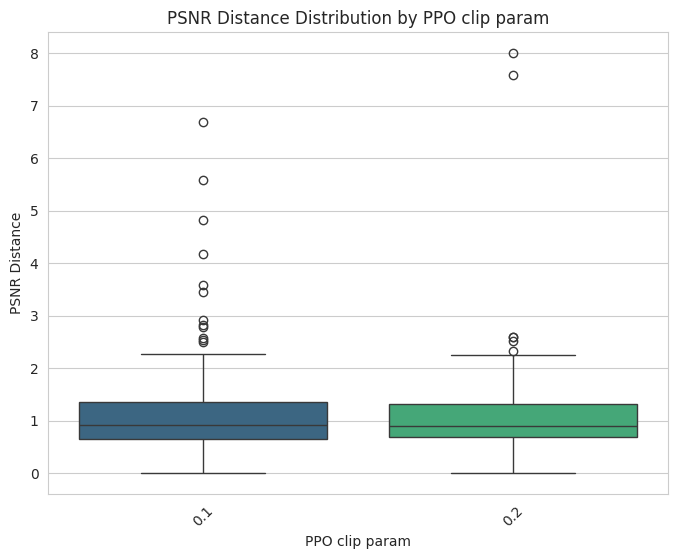

/tmp/ipykernel_2428867/3500708166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


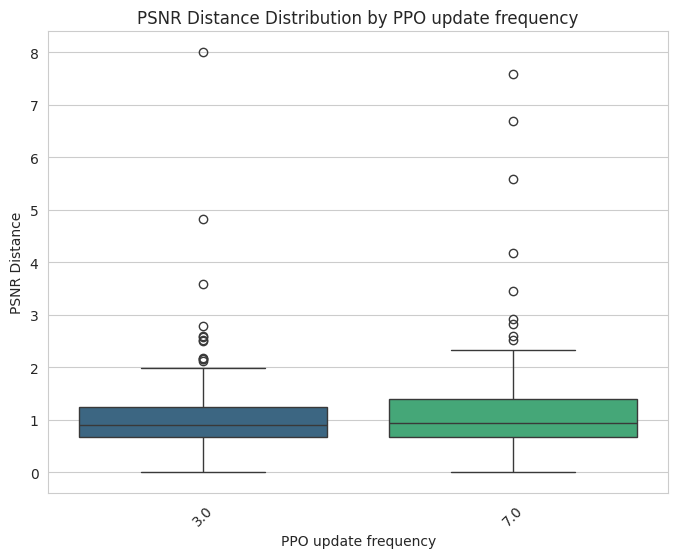

In [ ]:
# Iterate over parameters and create box plots
for param in parameters:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x=param,
        y='psnr_distance',
        data=combined_df,
        palette='viridis'
    )
    plt.title(f'PSNR Distance Distribution by {param}')
    plt.ylabel('PSNR Distance')
    plt.xlabel(param)
    plt.xticks(rotation=45)
    plt.show()

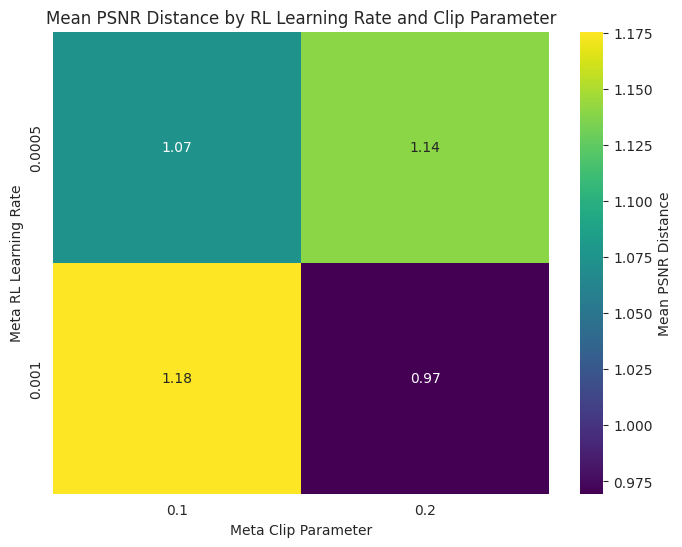

In [ ]:
# Create a pivot table
pivot_table = combined_df.pivot_table(
    values='psnr_distance',
    index='RL learning rate',
    columns='PPO clip param',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar_kws={'label': 'Mean PSNR Distance'}
)
plt.title('Mean PSNR Distance by RL Learning Rate and Clip Parameter')
plt.ylabel('Meta RL Learning Rate')
plt.xlabel('Meta Clip Parameter')
plt.show()

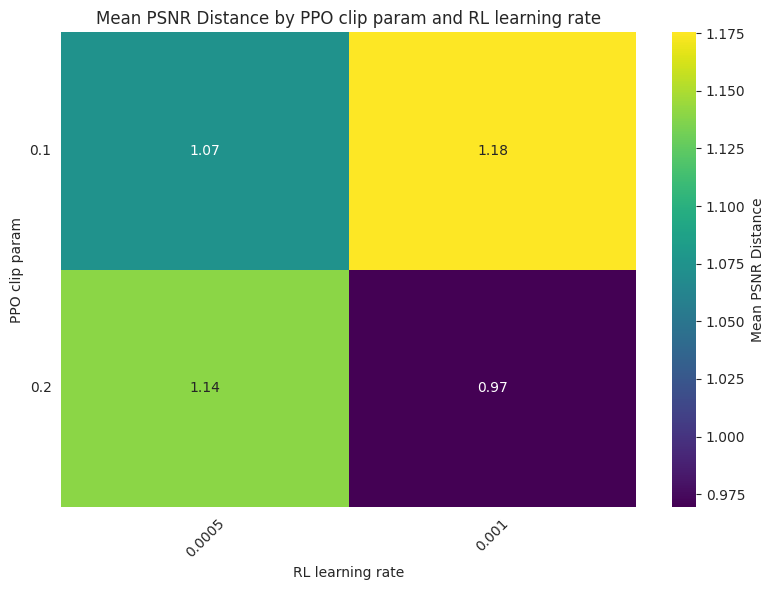

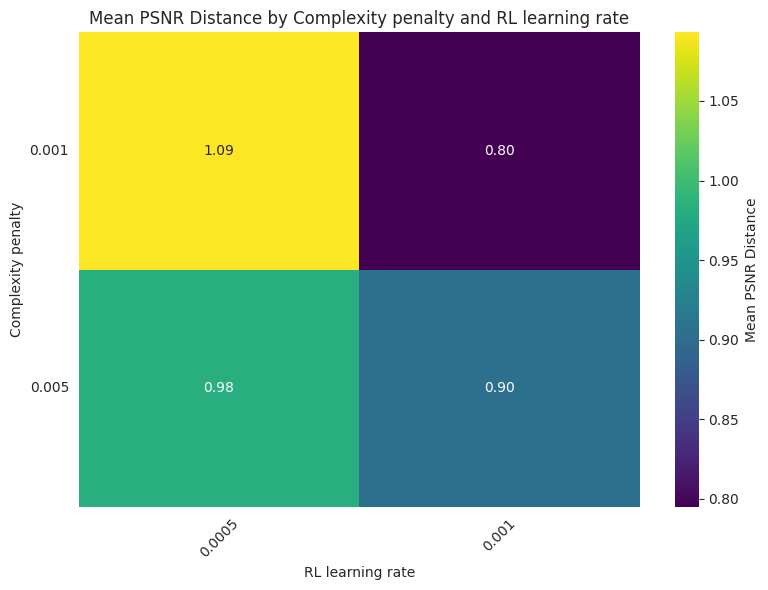

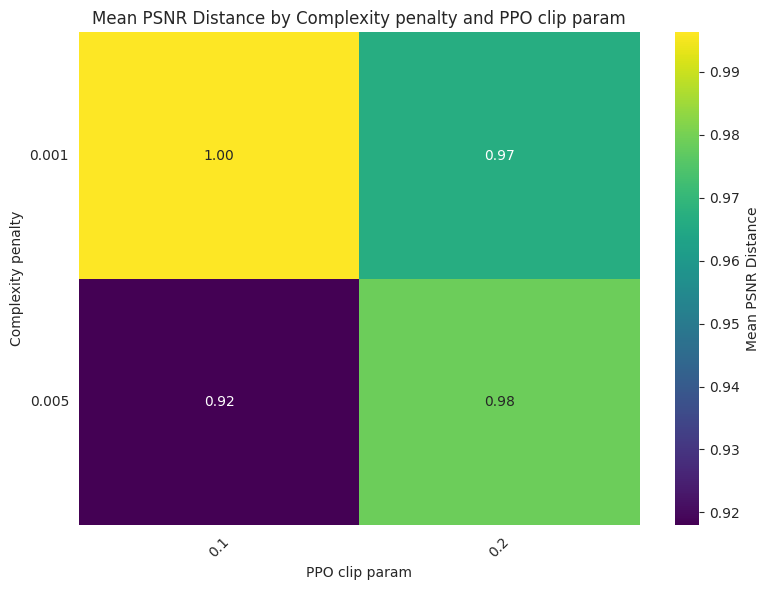

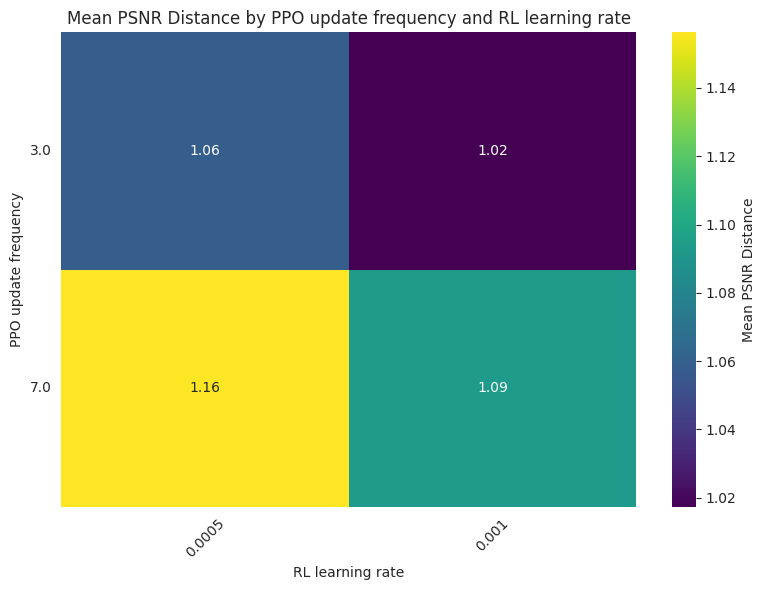

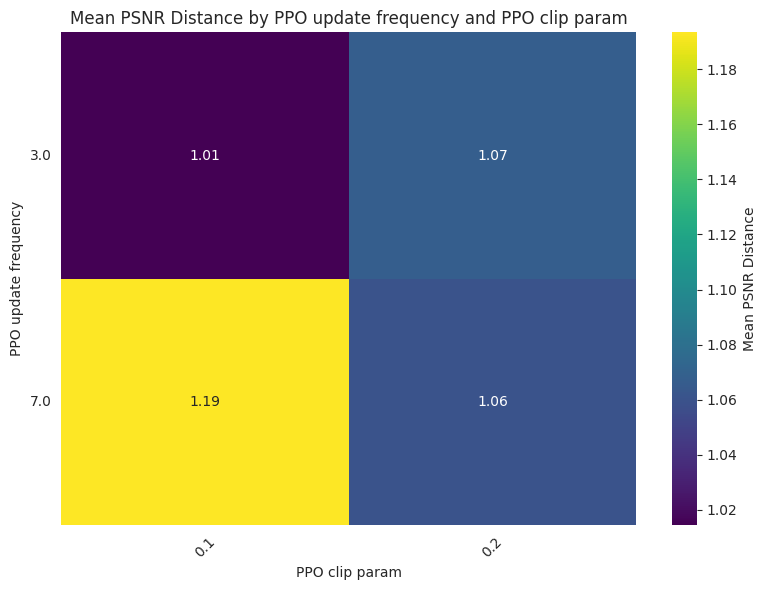

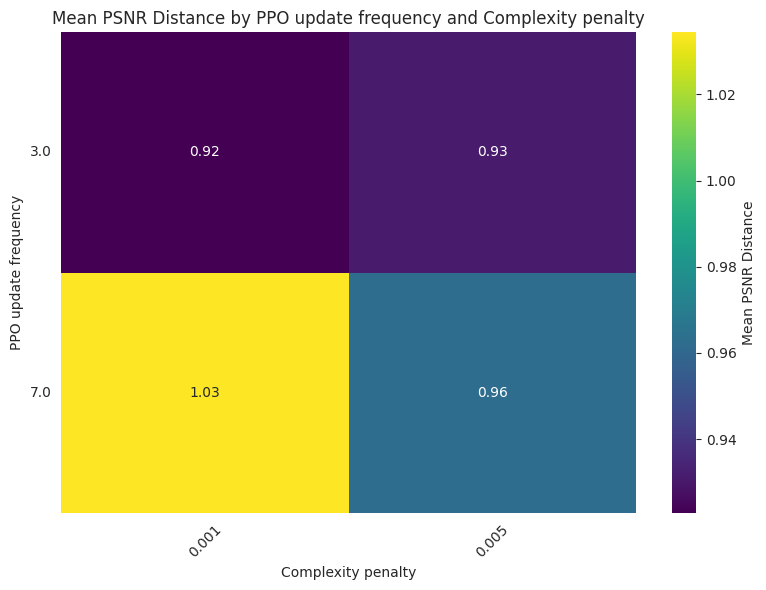

In [ ]:
# List of parameter combinations
param_combinations = [
    ('RL learning rate', 'PPO clip param'),
    ('RL learning rate', 'Complexity penalty'),
    ('PPO clip param', 'Complexity penalty'),
    ('RL learning rate', 'PPO update frequency'),
    ('PPO clip param', 'PPO update frequency'),
    ('Complexity penalty', 'PPO update frequency')
]

# Set up the plotting environment
sns.set_style('whitegrid')

# Iterate over parameter combinations
for idx, (param_x, param_y) in enumerate(param_combinations):
    # Create a pivot table
    pivot_table = combined_df.pivot_table(
        values='psnr_distance',
        index=param_y,
        columns=param_x,
        aggfunc='mean'
    )
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap='viridis',
        cbar_kws={'label': 'Mean PSNR Distance'}
    )
    plt.title(f'Mean PSNR Distance by {param_y} and {param_x}')
    plt.ylabel(param_y)
    plt.xlabel(param_x)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
# Dictionary to store the best combinations
best_combinations = {}

# Iterate over parameter combinations
for idx, (param_x, param_y) in enumerate(param_combinations):
    # Create a pivot table
    pivot_table = combined_df.pivot_table(
        values='psnr_distance',
        index=param_y,
        columns=param_x,
        aggfunc='mean'
    )
    
    # Find the minimum mean PSNR distance in the pivot table
    min_value = pivot_table.min().min()
    min_coords = pivot_table.stack().idxmin()
    best_param_x = min_coords[1]
    best_param_y = min_coords[0]
    
    # Store the best combination
    best_combinations[(param_x, param_y)] = {
        'mean_psnr_distance': min_value,
        param_x: best_param_x,
        param_y: best_param_y
    }

In [ ]:
print("Best Parameter Combinations for Each Pair:")
for params, results in best_combinations.items():
    param_x, param_y = params
    print(f"\nCombination: {param_y} and {param_x}")
    print(f"Lowest Mean PSNR Distance: {results['mean_psnr_distance']:.2f}")
    print(f"Best {param_x}: {results[param_x]}")
    print(f"Best {param_y}: {results[param_y]}")

Best Parameter Combinations for Each Pair:

Combination: PPO clip param and RL learning rate
Lowest Mean PSNR Distance: 0.97
Best RL learning rate: 0.001
Best PPO clip param: 0.2

Combination: Complexity penalty and RL learning rate
Lowest Mean PSNR Distance: 0.80
Best RL learning rate: 0.001
Best Complexity penalty: 0.001

Combination: Complexity penalty and PPO clip param
Lowest Mean PSNR Distance: 0.92
Best PPO clip param: 0.1
Best Complexity penalty: 0.005

Combination: PPO update frequency and RL learning rate
Lowest Mean PSNR Distance: 1.02
Best RL learning rate: 0.001
Best PPO update frequency: 3.0

Combination: PPO update frequency and PPO clip param
Lowest Mean PSNR Distance: 1.01
Best PPO clip param: 0.1
Best PPO update frequency: 3.0

Combination: PPO update frequency and Complexity penalty
Lowest Mean PSNR Distance: 0.92
Best Complexity penalty: 0.001
Best PPO update frequency: 3.0


In [ ]:
import scipy.stats as stats

# Perform ANOVA for each parameter
for param in parameters:
    groups = [group['psnr_distance'].values for name, group in combined_df.groupby(param)]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA for {param}: F = {f_val:.2f}, p = {p_val:.4f}")

ANOVA for Reward function: F = 8.80, p = 0.0000
ANOVA for Complexity penalty: F = 0.17, p = 0.6773
ANOVA for RL learning rate: F = 0.27, p = 0.6006
ANOVA for PPO clip param: F = 0.40, p = 0.5284
ANOVA for PPO update frequency: F = 0.98, p = 0.3223


/tmp/ipykernel_2428867/3237205142.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['normalized_psnr_distance'] = (combined_df['psnr_distance'] - combined_df['psnr_distance'].min()) / (combined_df['psnr_distance'].max() - combined_df['psnr_distance'].min())


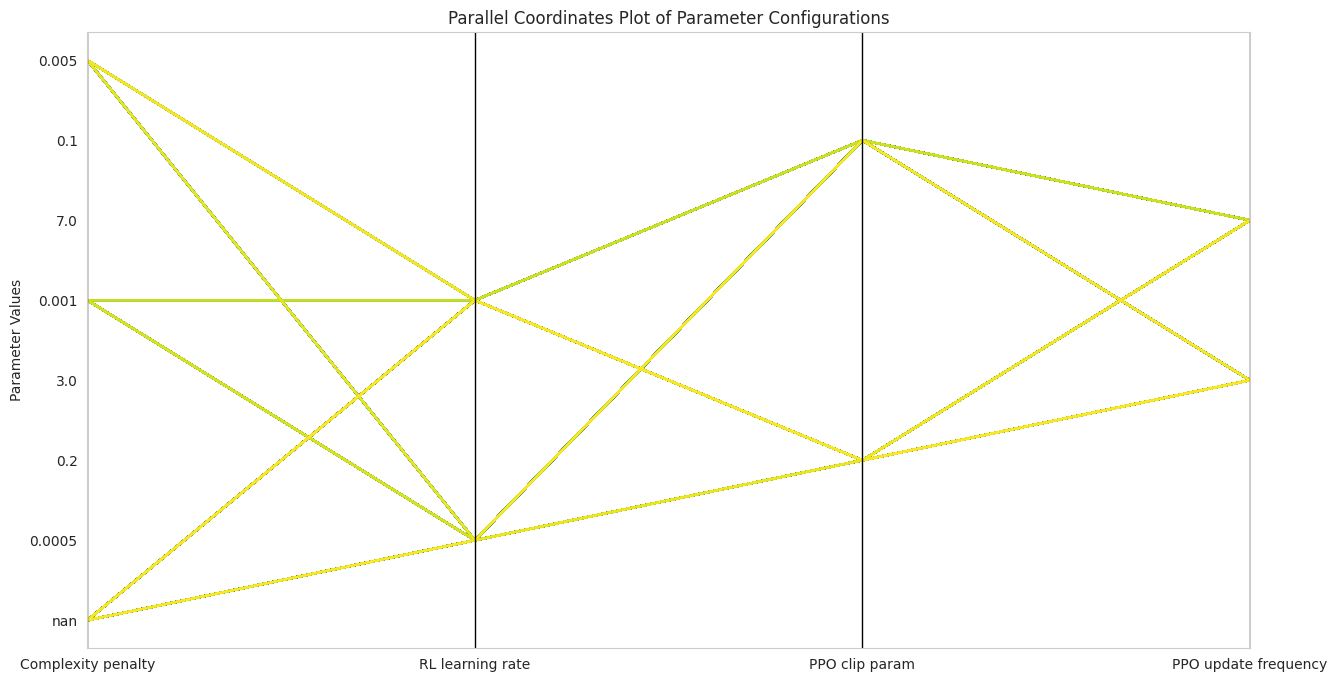

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming 'combined_df' is your DataFrame and 'psnr_distance' is computed

# Normalize PSNR distance for coloring
combined_df['normalized_psnr_distance'] = (combined_df['psnr_distance'] - combined_df['psnr_distance'].min()) / (combined_df['psnr_distance'].max() - combined_df['psnr_distance'].min())

# Select parameters and PSNR distance
parameters = ['Complexity penalty', 'RL learning rate', 'PPO clip param', 'PPO update frequency']
df_plot = combined_df[parameters + ['psnr_distance']].copy()

# Convert categorical parameters to strings
for col in parameters:
    df_plot[col] = df_plot[col].astype(str)

# Create the parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(df_plot, class_column='psnr_distance', colormap='viridis')
plt.title('Parallel Coordinates Plot of Parameter Configurations')
plt.ylabel('Parameter Values')
plt.legend([],[], frameon=False)  # Remove legend for clarity
plt.show()



In [ ]:
# Sort DataFrame by PSNR distance
combined_df_sorted = combined_df.sort_values('psnr_distance')

# Display top configurations
top_configs = combined_df_sorted[['Complexity penalty', 'RL learning rate', 'PPO clip param', 'PPO update frequency', 'psnr_distance']].head(100)
print(top_configs)

     Complexity penalty  RL learning rate  PPO clip param  \
380               0.001            0.0010             0.1   
293               0.001            0.0010             0.2   
322                 NaN            0.0010             0.1   
266                 NaN            0.0005             0.1   
247               0.005            0.0005             0.1   
..                  ...               ...             ...   
198               0.005            0.0010             0.1   
14                  NaN            0.0005             0.1   
70                  NaN            0.0010             0.1   
45                  NaN            0.0005             0.1   
138               0.001            0.0010             0.1   

     PPO update frequency  psnr_distance  
380                   7.0       0.001664  
293                   3.0       0.004057  
322                   3.0       0.006360  
266                   3.0       0.007836  
247                   7.0       0.023052  
..       